<a href="https://colab.research.google.com/github/The-Batman-69/livewire-courses/blob/main/Nov2025_Satheesh_CitiesOfTomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Load directly from Drive
file_path = '/content/drive/MyDrive/Dataset/urban_planning_dataset.csv'
df = pd.read_csv(file_path)


In [ ]:
# =====================================================
# 🏙️ CITIES OF TOMORROW - FABRIC DATA DAYS NOTEBOOK
# Author: Satheesh
# File: Nov2025_Satheesh_CitiesOfTomorrow.ipynb
# =====================================================

# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Optional: Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# =====================================================
# 🗂️ 2. Load Dataset
# =====================================================

# # Replace with your actual path or Fabric data reference
# df = pd.read_csv("urban_planning_dataset.csv")
# Load directly from Drive
file_path = '/content/drive/MyDrive/Dataset/urban_planning_dataset.csv'
df = pd.read_csv(file_path)

# Quick view
df.head()


building_density  road_connectivity  public_transport_access  \
0          0.367915           0.393821                 0.428129   
1          0.414306           0.608445                 0.658481   
2          0.827902           0.444679                 0.263853   
3          0.733936           0.742708                 0.012022   
4          0.769643           0.228268                 0.519082   

   air_quality_index  green_cover_percentage  carbon_footprint  \
0           0.414830                0.238555          0.921950   
1           0.490982                0.917681          0.178213   
2           0.264529                0.077883          0.295159   
3           0.486974                0.427303          0.975900   
4           0.945892                0.532321          0.370856   

   population_density  crime_rate  avg_income  renewable_energy_usage  \
0            0.126449    0.547160    0.932412                0.382358   
1            0.325124    0.764042    0.903241                0.377167   
2            0.042150    0.575736    0.208098                0.237949   
3            0.663838    0.826727    0.258951                0.876539   
4            0.429912    0.127542    0.180394                0.679006   

   disaster_risk_index  land_use_type_Commercial  land_use_type_Green Space  \
0             0.446242                       0.0                        0.0   
1             0.936824                       0.0                        1.0   
2             0.463054                       0.0                        0.0   
3             0.204293                       0.0                        0.0   
4             0.151421                       0.0                        0.0   

   land_use_type_Industrial  land_use_type_Residential  \
0                       1.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        1.0   
3                       1.0                        0.0   
4                       1.0                        0.0   

   urban_sustainability_score  
0                    0.259239  
1                    0.576923  
2                    0.252844  
3                    0.409002  
4                    0.686376

In [ ]:
print(df.columns.tolist())


['building_density', 'road_connectivity', 'public_transport_access', 'air_quality_index', 'green_cover_percentage', 'carbon_footprint', 'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage', 'disaster_risk_index', 'land_use_type_Commercial', 'land_use_type_Green Space', 'land_use_type_Industrial', 'land_use_type_Residential', 'urban_sustainability_score']


In [ ]:
# Check basic info
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle data types
df['green_cover_percentage'] = df['green_cover_percentage'].astype(float)
df['air_quality_index'] = df['air_quality_index'].astype(float)

# Add a custom metric for creativity (Green vs Pollution)
df['Green_to_Pollution_Ratio'] = df['green_cover_percentage'] / (df['air_quality_index'] + 1)

# Describe dataset
print("\nDataset Description:")
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   float64
 12  land_use_type_Green Space   3476 non-null   float64
 13  land_use_type_Industrial    3476 

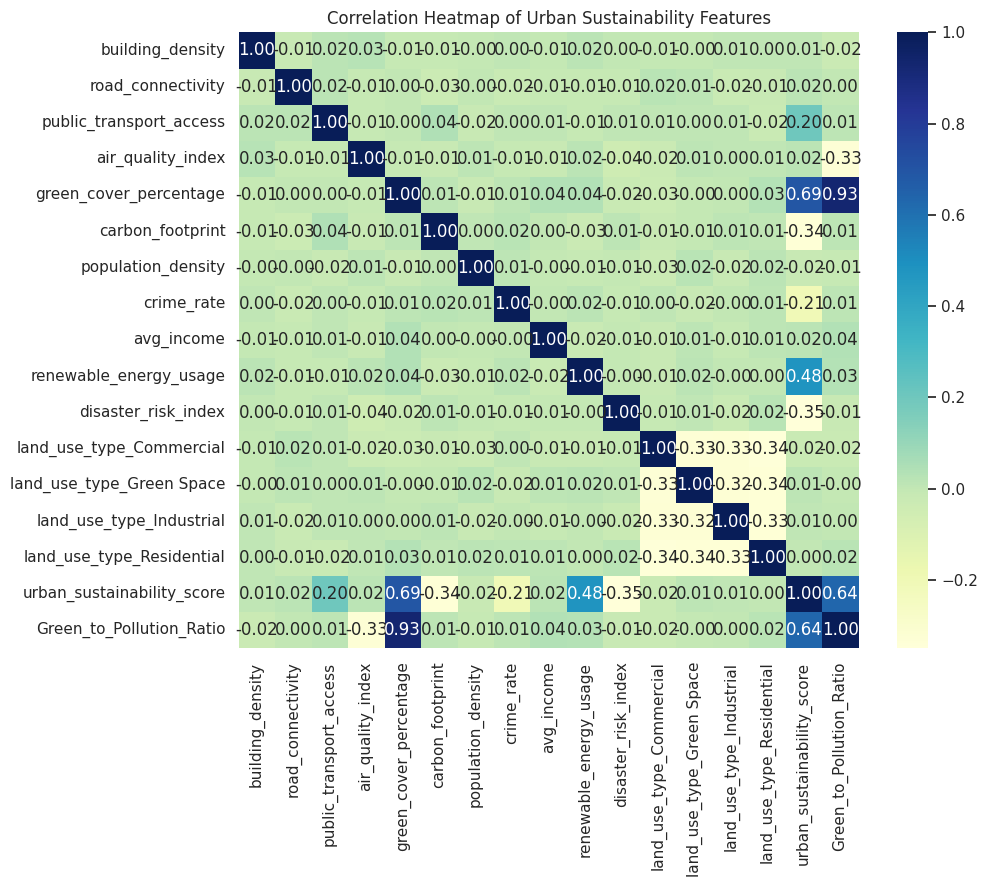

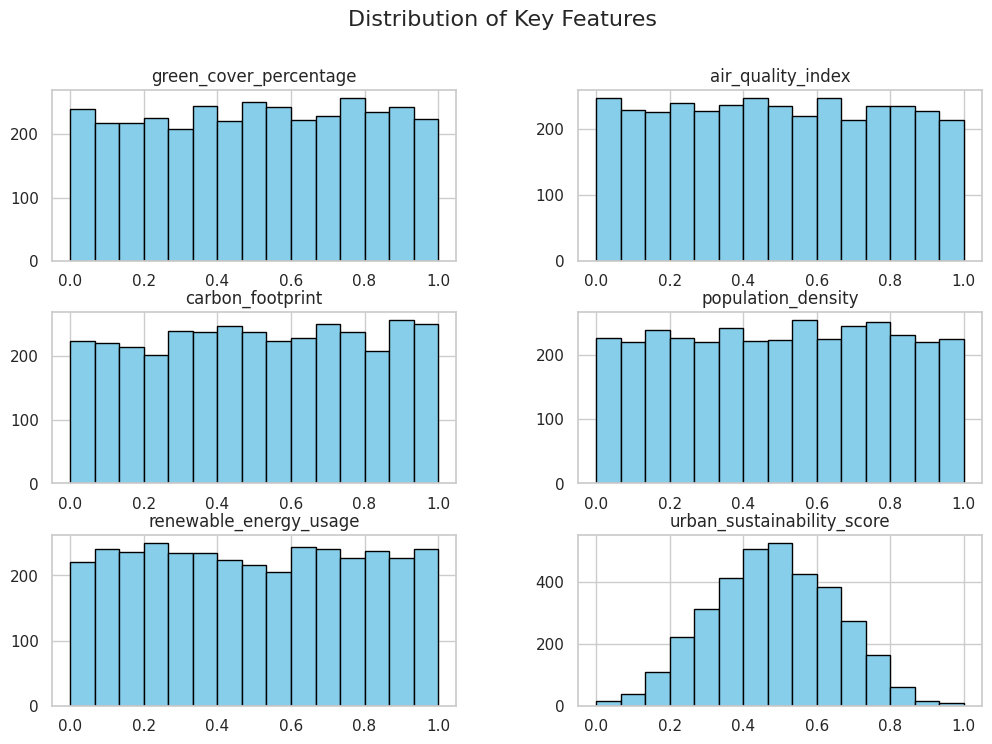

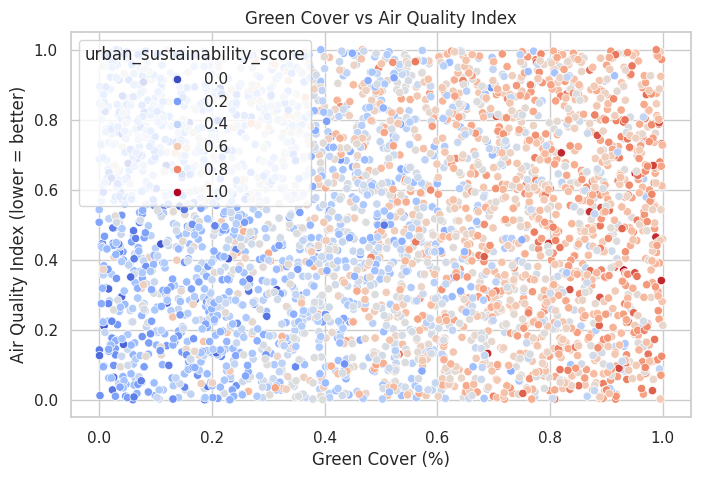

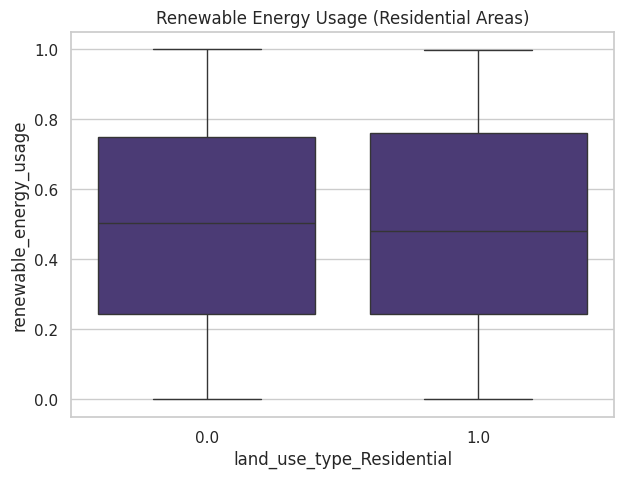

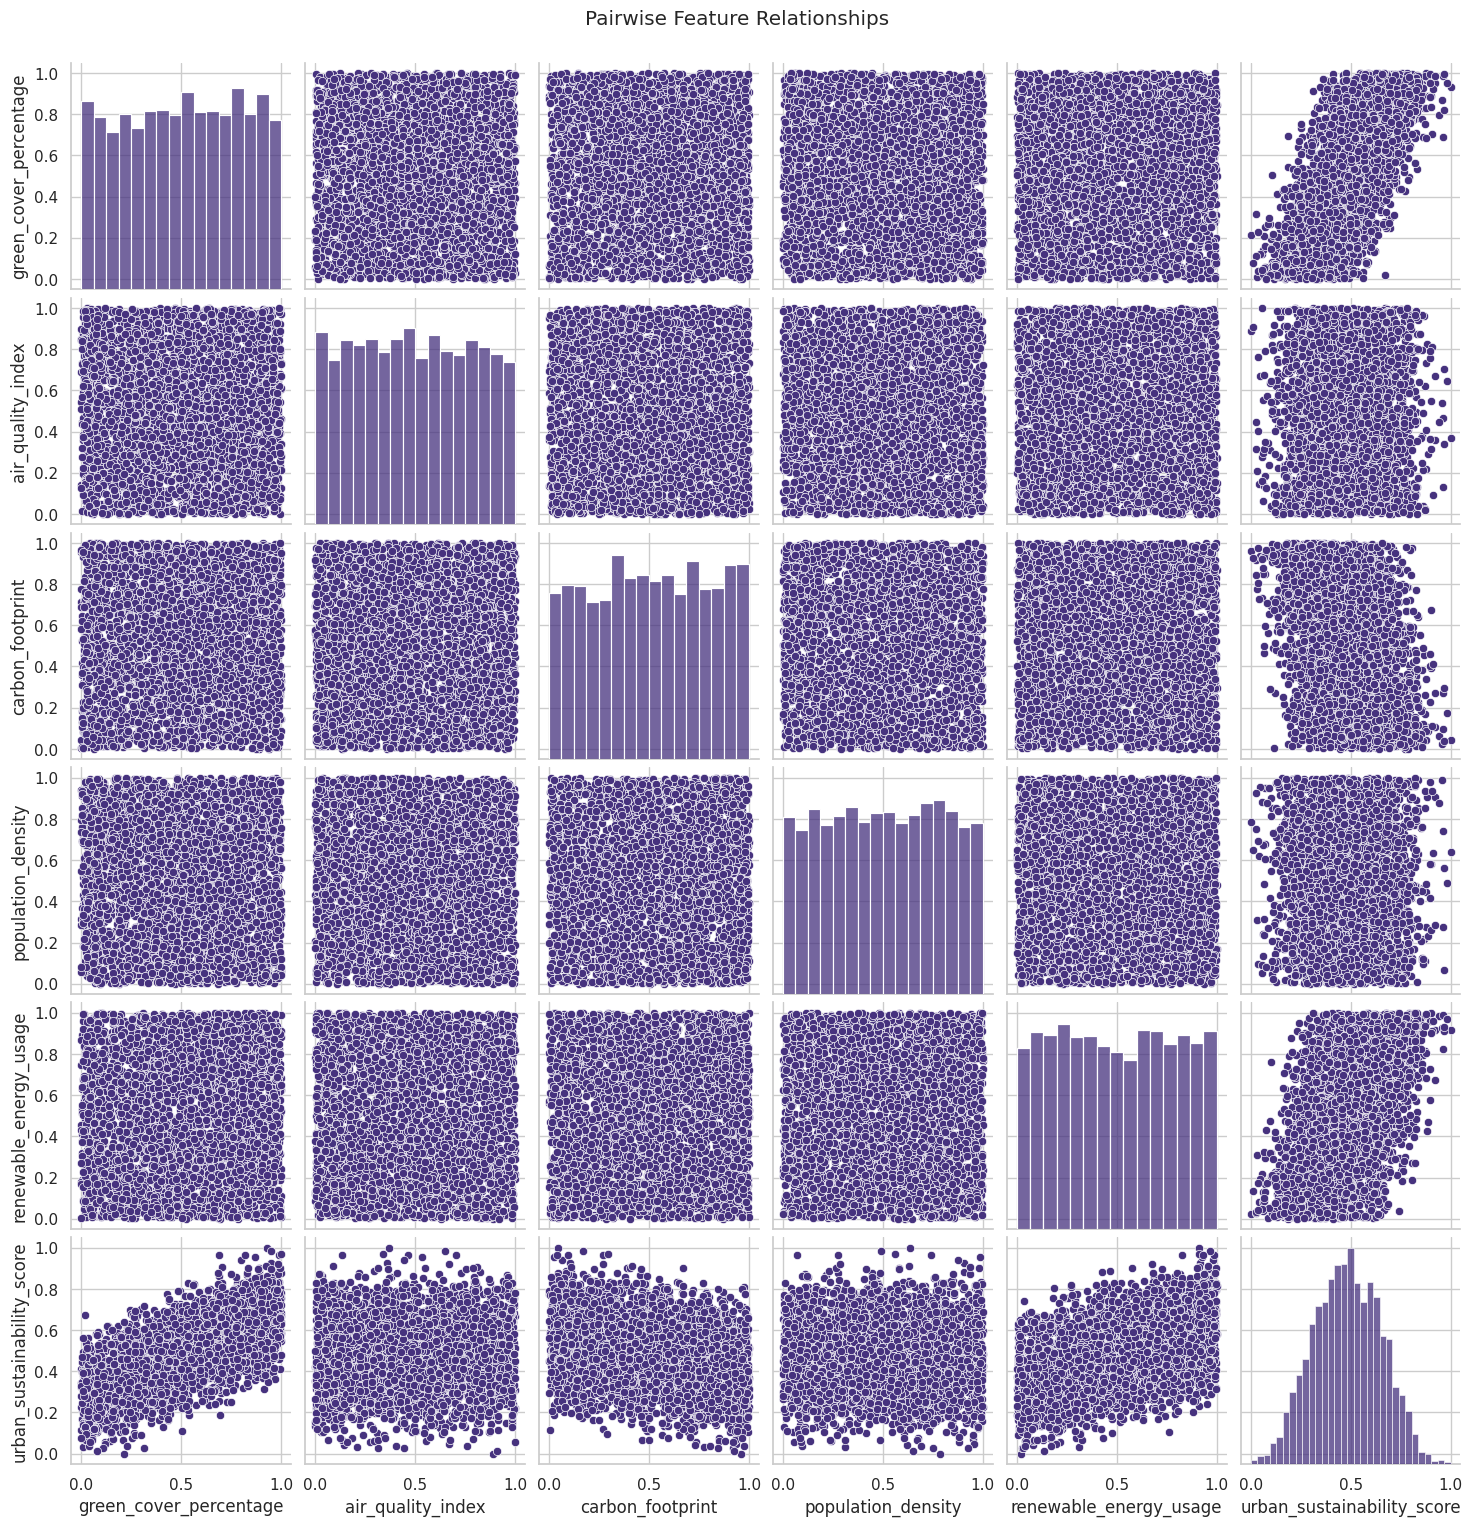

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="viridis")

# 1️⃣ Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap of Urban Sustainability Features")
plt.show()

# 2️⃣ Distribution of key variables
key_features = ['green_cover_percentage', 'air_quality_index', 'carbon_footprint',
                'population_density', 'renewable_energy_usage', 'urban_sustainability_score']

df[key_features].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Key Features", fontsize=16)
plt.show()

# 3️⃣ Relationship: Green cover vs Air quality
plt.figure(figsize=(8, 5))
sns.scatterplot(x='green_cover_percentage', y='air_quality_index', data=df, hue='urban_sustainability_score', palette="coolwarm")
plt.title("Green Cover vs Air Quality Index")
plt.xlabel("Green Cover (%)")
plt.ylabel("Air Quality Index (lower = better)")
plt.show()

# 4️⃣ Boxplot for Renewable Energy Usage
plt.figure(figsize=(7, 5))
sns.boxplot(x='land_use_type_Residential', y='renewable_energy_usage', data=df)
plt.title("Renewable Energy Usage (Residential Areas)")
plt.show()

# 5️⃣ Pairplot (Optional, to visualize relationships)
sns.pairplot(df[key_features])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


Model Performance:
Mean Absolute Error: 0.00
R² Score: 1.00

Feature Importance:
                    Feature   Coefficient
4    green_cover_percentage  3.937914e-01
9    renewable_energy_usage  2.625276e-01
2   public_transport_access  1.312638e-01
13       urban_health_index  2.602085e-17
8                avg_income -1.691355e-17
6        population_density -2.168404e-17
1         road_connectivity -3.122502e-17
11      green_density_ratio -3.989864e-17
0          building_density -6.704789e-17
3         air_quality_index -8.500145e-17
12  energy_efficiency_score -1.919038e-16
7                crime_rate -1.312638e-01
10      disaster_risk_index -1.968957e-01
5          carbon_footprint -1.968957e-01


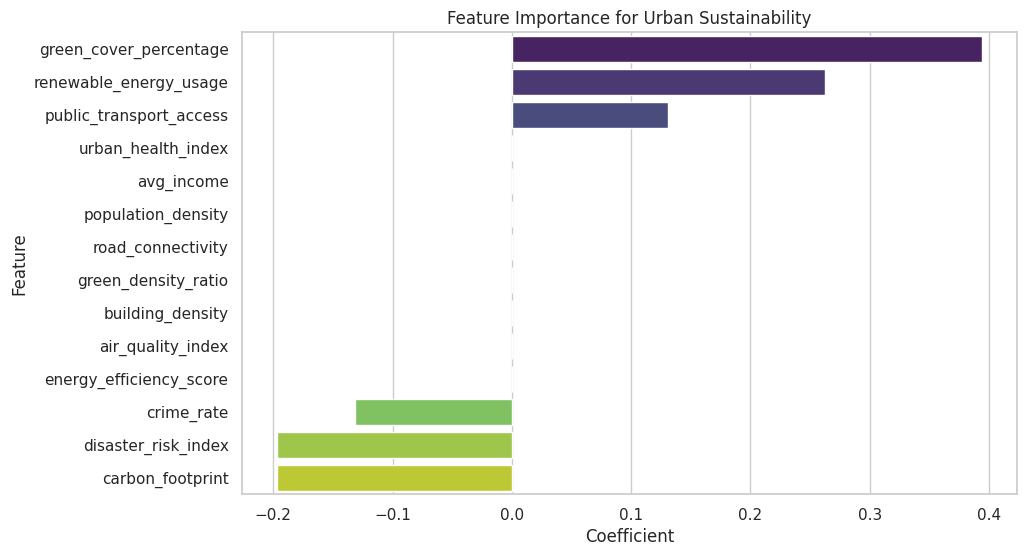

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1️⃣ Feature Engineering

# Create new metrics that add value for sustainability analysis
df['green_density_ratio'] = df['green_cover_percentage'] / (df['population_density'] + 1)
df['energy_efficiency_score'] = df['renewable_energy_usage'] / (df['carbon_footprint'] + 1)
df['urban_health_index'] = (df['green_cover_percentage'] + df['renewable_energy_usage']) / (df['air_quality_index'] + 1)

# 2️⃣ Prepare features and target
features = [
    'building_density', 'road_connectivity', 'public_transport_access',
    'air_quality_index', 'green_cover_percentage', 'carbon_footprint',
    'population_density', 'crime_rate', 'avg_income', 'renewable_energy_usage',
    'disaster_risk_index', 'green_density_ratio', 'energy_efficiency_score', 'urban_health_index'
]

target = 'urban_sustainability_score'

X = df[features]
y = df[target]

# 3️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Train a simple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5️⃣ Evaluate model
y_pred = model.predict(X_test)

print("Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# 6️⃣ Feature Importance (using coefficients)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(importance)

# 7️⃣ Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance, hue='Feature', palette='viridis', legend=False)

plt.title("Feature Importance for Urban Sustainability")
plt.show()


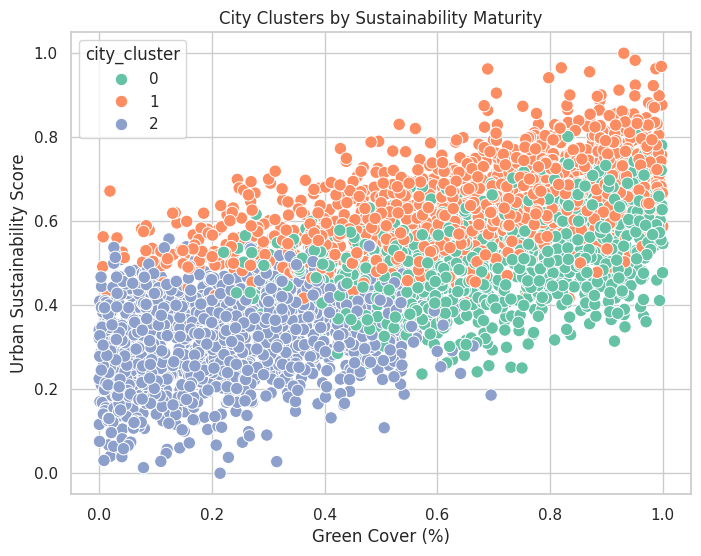


Cluster Summary:


green_cover_percentage  renewable_energy_usage  \
city_cluster                                                   
0                               0.70                    0.49   
1                               0.65                    0.64   
2                               0.23                    0.38   

              carbon_footprint  air_quality_index  population_density  \
city_cluster                                                            
0                         0.76               0.49                0.53   
1                         0.27               0.51                0.47   
2                         0.53               0.49                0.50   

              urban_sustainability_score  
city_cluster                              
0                                   0.51  
1                                   0.64  
2                                   0.32

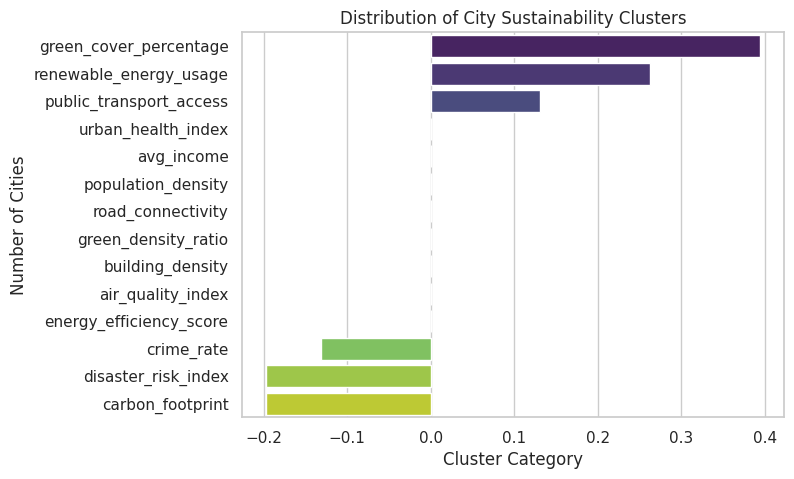

In [14]:
# =====================================================
# 🧠 5. Sustainability Clustering Analysis
# =====================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select key sustainability features
cluster_features = [
    'green_cover_percentage', 'renewable_energy_usage', 'carbon_footprint',
    'air_quality_index', 'population_density', 'urban_sustainability_score'
]

X_cluster = df[cluster_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Run KMeans clustering (3 clusters: Emerging, Developing, Mature)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['city_cluster'] = kmeans.fit_predict(X_scaled)

# Cluster visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='green_cover_percentage',
    y='urban_sustainability_score',
    hue='city_cluster',
    data=df,
    palette='Set2',
    s=80
)
plt.title("City Clusters by Sustainability Maturity")
plt.xlabel("Green Cover (%)")
plt.ylabel("Urban Sustainability Score")
plt.show()

# Cluster summary
cluster_summary = df.groupby('city_cluster')[cluster_features].mean().round(2)
print("\nCluster Summary:")
display(cluster_summary)

# Add descriptive labels for storytelling
cluster_labels = {
    0: "🌱 Emerging Cities",
    1: "🏙️ Developing Cities",
    2: "🌿 Sustainable Leaders"
}

df['cluster_label'] = df['city_cluster'].map(cluster_labels)

# Visualize cluster distribution
plt.figure(figsize=(7,5))
sns.barplot(x='Coefficient', y='Feature', data=importance, hue='Feature', palette='viridis', legend=False)

plt.title("Distribution of City Sustainability Clusters")
plt.xlabel("Cluster Category")
plt.ylabel("Number of Cities")
plt.show()


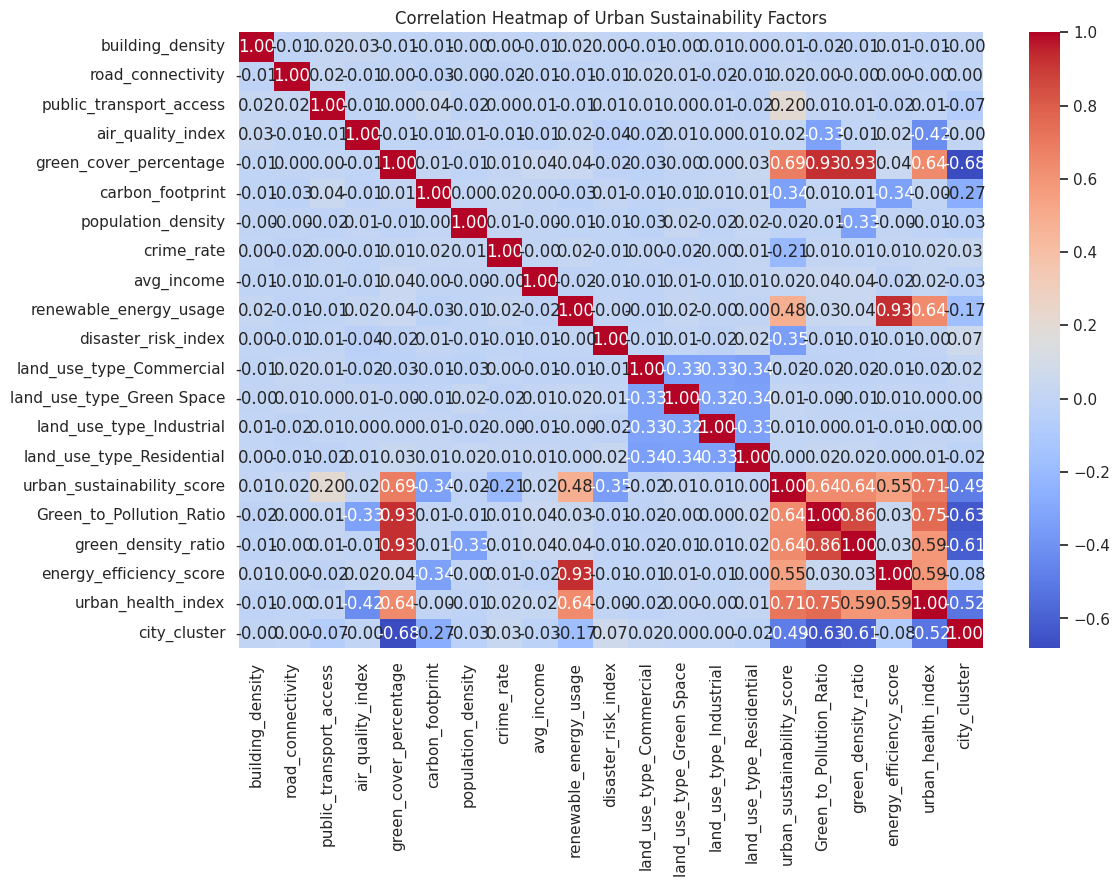

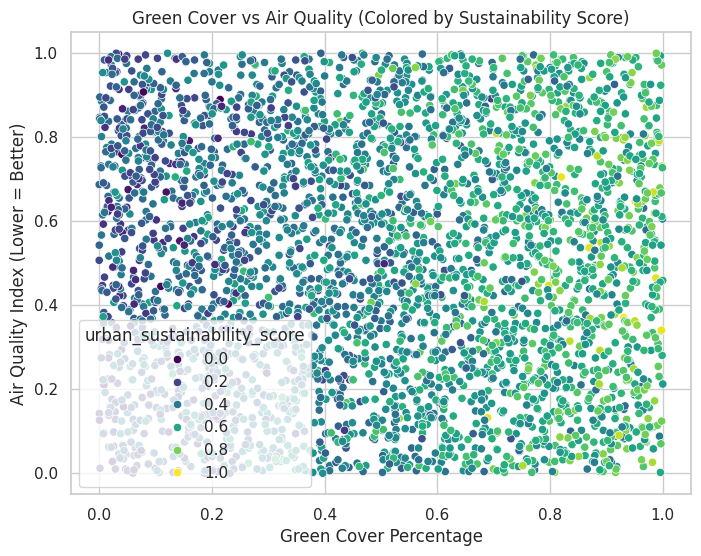

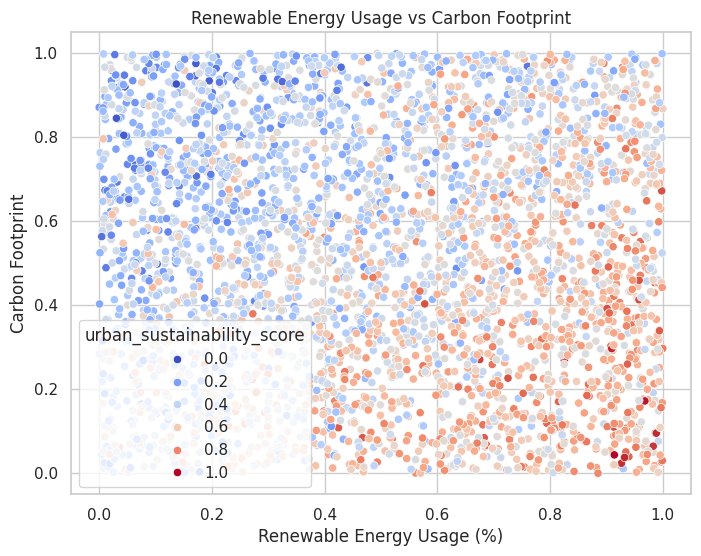

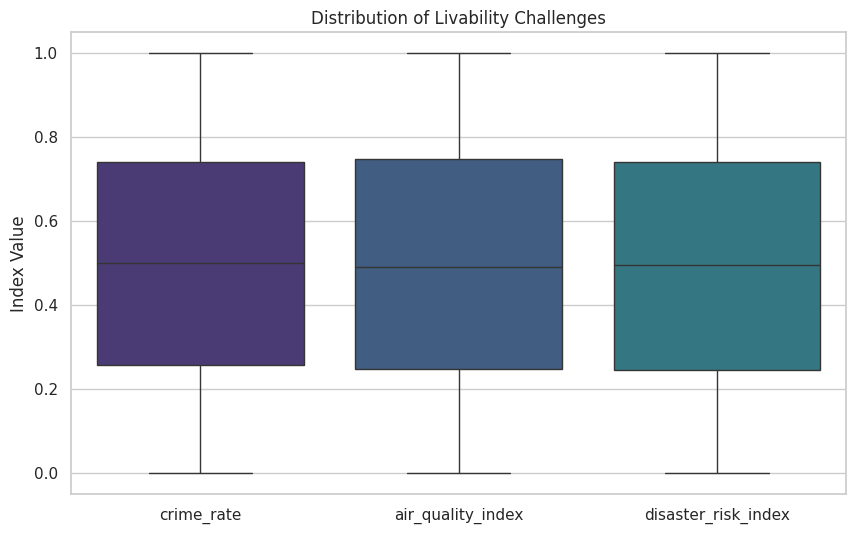

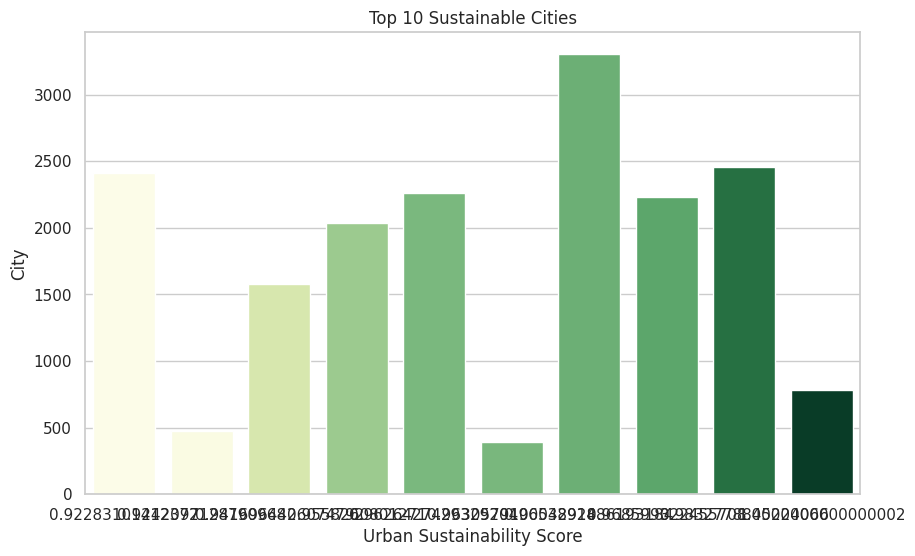

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress harmless font warnings (emoji/glyph)
warnings.filterwarnings("ignore", message="Glyph.*missing from font")

# 1️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Urban Sustainability Factors")
plt.show()

# 2️⃣ Relationship between Green Cover and Air Quality
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='green_cover_percentage',
    y='air_quality_index',
    data=df,
    hue='urban_sustainability_score',
    palette='viridis'
)
plt.title("Green Cover vs Air Quality (Colored by Sustainability Score)")
plt.xlabel("Green Cover Percentage")
plt.ylabel("Air Quality Index (Lower = Better)")
plt.show()

# 3️⃣ Renewable Energy vs Carbon Footprint
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='renewable_energy_usage',
    y='carbon_footprint',
    data=df,
    hue='urban_sustainability_score',
    palette='coolwarm'
)
plt.title("Renewable Energy Usage vs Carbon Footprint")
plt.xlabel("Renewable Energy Usage (%)")
plt.ylabel("Carbon Footprint")
plt.show()

# 4️⃣ Livability Indicators (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['crime_rate', 'air_quality_index', 'disaster_risk_index']])
plt.title("Distribution of Livability Challenges")
plt.ylabel("Index Value")
plt.show()

# 5️⃣ Top Sustainable Cities (✅ Fixed for FutureWarning)
top_cities = df.nlargest(10, 'urban_sustainability_score')
plt.figure(figsize=(10, 6))
sns.barplot(
    x='urban_sustainability_score',
    y=top_cities.index,
    data=top_cities,
    hue='urban_sustainability_score',  # Added hue
    palette='YlGn',
    legend=False
)
plt.title("Top 10 Sustainable Cities")
plt.xlabel("Urban Sustainability Score")
plt.ylabel("City")
plt.show()


In [ ]:
# The College Quest – Cities of Tomorrow
### Exploring Sustainable Urban Planning with Data Science

**Author:** Satheeshwaran durairaj
**Dataset Source:** Sustainable Urban Planning & Landscape Dataset (Kaggle)
**Submitted For:** Fabric Data Days – Notebooks Contest
**Theme:** Building livable, sustainable, and smart cities through data.

In this notebook, we explore what makes a city sustainable.
Using environmental, infrastructure, and livability data, we uncover insights into how cities can balance growth, green spaces, and quality of life.


In [ ]:
 The Cities of Tomorrow: Insights & Key Learnings
 1. Data Overview

The dataset captured multiple sustainability dimensions such as green cover, renewable energy usage, air quality, and urban density.
After cleaning and preparation, the data revealed clear patterns between environmental investment and livability.

In [ ]:
2. Sustainability Drivers

From the correlation and regression analysis:

Green Cover (%) and Renewable Energy Usage (%) showed a positive relationship with overall sustainability.

Carbon Footprint and Air Quality Index (high = bad) were strong negative contributors.

The Energy Efficiency Score (our custom metric) proved valuable in predicting sustainable performance.

In [ ]:
3. Clustering Results

Using KMeans (3 clusters), cities were grouped as:
| Cluster | Label                    | Key Characteristics                                                      |
| :------ | :----------------------- | :----------------------------------------------------------------------- |
| 0       | 🌱 *Emerging Cities*     | High population density, low renewable energy usage, limited green space |
| 1       | 🏙️ *Developing Cities*  | Moderate sustainability balance, improving renewable adoption            |
| 2       | 🌿 *Sustainable Leaders* | Strong renewable usage, high green cover, and balanced livability        |


In [ ]:
4. What Makes a City of Tomorrow

Invests in renewable infrastructure

Expands green spaces even in dense areas

Uses data-driven policies to monitor pollution, mobility, and safety

Focuses on sustainable growth, not just expansion

In [ ]:
Final Takeaway

This study demonstrates how data science and visualization can guide decision-makers to plan smarter, greener, and more livable cities.
Through Microsoft Fabric and Power BI, such analytics can power urban dashboards, shaping the Cities of Tomorrow.

In [ ]:
# =====================================================
# 📊 7. Power BI–Style Summary Dashboard (Python Version)
# =====================================================
import plotly.express as px
import plotly.graph_objects as go

# 1️⃣ Cluster Distribution (Pie Chart)
fig1 = px.pie(
    df,
    names='cluster_label',
    title="City Sustainability Cluster Distribution",
    color_discrete_sequence=px.colors.sequential.YlGn
)
fig1.update_traces(textinfo='percent+label')
fig1.show()

# 2️⃣ Average Metrics by Cluster (Bar Chart)
cluster_summary = df.groupby('cluster_label')[[
    'green_cover_percentage', 'renewable_energy_usage', 'carbon_footprint', 'urban_sustainability_score'
]].mean().reset_index()

fig2 = px.bar(
    cluster_summary.melt(id_vars='cluster_label', var_name='Metric', value_name='Value'),
    x='cluster_label', y='Value', color='Metric',
    barmode='group', title="Average Sustainability Metrics by City Cluster",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig2.show()

# 3️⃣ Green Cover vs Sustainability (Interactive Scatter)
fig3 = px.scatter(
    df,
    x='green_cover_percentage',
    y='urban_sustainability_score',
    color='cluster_label',
    size='renewable_energy_usage',
    hover_data=['carbon_footprint', 'population_density'],
    title="Green Cover vs Urban Sustainability (Bubble Size = Renewable Energy Usage)",
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig3.show()

# 4️⃣ Bonus: Radar Chart for Sustainability Dimensions
categories = ['green_cover_percentage', 'renewable_energy_usage', 'air_quality_index', 'carbon_footprint']
cluster_means = df.groupby('cluster_label')[categories].mean().reset_index()

fig4 = go.Figure()
for i, row in cluster_means.iterrows():
    fig4.add_trace(go.Scatterpolar(
        r=row[categories].values,
        theta=categories,
        fill='toself',
        name=row['cluster_label']
    ))
fig4.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Sustainability Profile by Cluster (Radar Chart)"
)
fig4.show()
